
#**Analyse the 115th US Congress data and find out which member is the most important person in this Congress.**

This is an anomaly detection problem where we are interested in finding an individual who is exceptionally good. My criteria for judging an individual as the important person is based on the leadership quality and activeness of an individual in Congress. We will start by defining the feature space. Since the features can be correlated, so we will use PCA to find the uncorrelated variables in 2D space. Then, we will proceed with outlier detection. In Gaussian distribution, outliers are the points which are 3σ away from the mean. So, we will find a list of outliers and find the best out of them by ranking their features. Last, we will define a three-dimensional space in which each outlier is represented as a vector defined by the ranking space and will calculate the Euclidean distance of each outlier from the origin and find the minimum.

It is divided into the following sections:
- Getting the necessary libraries & data
- Performing feature engineering to extract features
- PCA Analysis
- Outlier Detection

# **Importing libraries & reading dataset**

In [ ]:
#importing all the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#reading all the datasets
adjacency = pd.read_csv('https://raw.githubusercontent.com/sg-dev/assignment_PhDposition/master/task4_data/adjacency_matrices-115.csv', sep='\t')
edgelist = pd.read_csv('https://raw.githubusercontent.com/sg-dev/assignment_PhDposition/master/task4_data/edgelists-115.csv', sep='\t')
members = pd.read_csv('https://raw.githubusercontent.com/sg-dev/assignment_PhDposition/master/task4_data/members-115.csv', sep='\t')
bills = pd.read_csv('https://raw.githubusercontent.com/sg-dev/assignment_PhDposition/master/task4_data/bills-115.csv', sep='\t')
individuals = pd.read_csv('https://raw.githubusercontent.com/sg-dev/assignment_PhDposition/master/task4_data/individuals.csv', sep='\t')

# **Feature engineering**

In this section, we will define our feature space by determining three features which shows the leadership quality and the activeness of the members.

**Feature 1** : No. of bills proposed by an individual member

In [ ]:
id = members['SGID']
f1 = members['number_of_bills']                     #storing the no. of bills proposed by each member pf 115th Congress

**Feature 2** : Total no. of times other members supported the bills proposed by each individual

In [ ]:
id_str = np.asarray(id, dtype=np.unicode_)                        #converting the SGIDs into array of string
f2 = [sum(adjacency[id_str[i]]) for i in range(0,len(id))]        #calculating how often other members supported their bills by vertically summing the adjacency matrix

**Feature 3** : No. of congress periods each individual serves. This shows the experience of an individual.

In [ ]:
f3 = [individuals['num_congress_periods'][j]  for j in range (0,len(individuals['SGID'])) for i in id if i == individuals['SGID'][j] ]  #extracting no. of congress periods from individual.csv based on the SGID of each 452 members.

**Combining all the features to a new dataframe**

Now, we will create a new dataframe consists of all the 3 features. We will also normalize the content by using the StandardScalar function.

In [ ]:
listOfStr = ["no_of_bills", "members_supported", "congress_period"]
temp = [f1, f2, f3]
df_features = StandardScaler().fit_transform(pd.DataFrame (dict(zip(listOfStr, temp)), columns = listOfStr))  #creating a new dataframe and normalising the features

#**Principal Component Analysis**

It is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

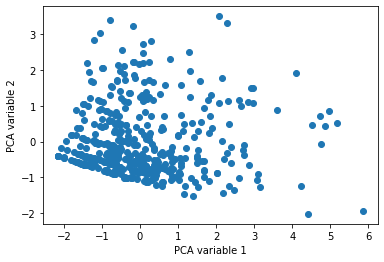

7.859986015045356e-17 1.1721629472286939


In [ ]:
pca = PCA(n_components=2)                                           #initialize an object by defining the desired uncorrelated variables
principalComponents = pca.fit_transform(df_features)
plt.scatter(principalComponents[:,0], principalComponents[:,1])     #plotting the uncorrelated variables in 2D space
plt.xlabel('PCA variable 1')
plt.ylabel('PCA variable 2')
plt.show()

print(principalComponents.mean(),principalComponents.std())         #printing the mean and the standard deviation of the uncorrelated data

# **Outlier Analysis**

In this section, we will find the points which are 3 standard deviation away from the mean and eliminate them. Them we will rank all the three features of the outliers in descending order to define a ranking space. Last, we will calculate the Euclidean distance of each outlier from the origin and find the minimum.


In [ ]:
principalComponents = (principalComponents - principalComponents.mean())/principalComponents.std()
distance = np.sqrt(principalComponents[:,0]**2 + principalComponents[:,1]**2)

#finding outliers which are 3 standard devition away from the mean
filtered_dist =  [ i for i in distance if i>3.0]
filtered_id =  [ id[i] for i in range(0,len(distance)) if distance[i]>3.0]
filtered_f1 =  [ f1[i] for i in range(0,len(distance)) if distance[i]>3.0]
filtered_f2 =  [ f2[i] for i in range(0,len(distance)) if distance[i]>3.0]
filtered_f3 =  [ f3[i] for i in range(0,len(distance)) if distance[i]>3.0]

listOfStr = ["SGID", "f1", "f2", "f3"]
temp = [filtered_id, filtered_f1, filtered_f2, filtered_f3]
filtered_features = pd.DataFrame (dict(zip(listOfStr, temp)), columns = listOfStr)    #creating a new dataframe for the list of outliers

#defining a ranking space by ranking the all the features of the outliers
filtered_features['ranked_f1'] = filtered_features['f1'].rank(ascending=0)
filtered_features['ranked_f2'] = filtered_features['f2'].rank(ascending=0)
filtered_features['ranked_f3'] = filtered_features['f3'].rank(ascending=0)

#calculating the distance of the outliers from the origin in the ranking space
filtered_features['overall_dist'] = filtered_features['ranked_f1']**2 +filtered_features['ranked_f2']**2 + filtered_features['ranked_f3']**2
filtered_features['overall_rank'] = filtered_features['overall_dist']**(1/2)

#finding the minimum distance 
value = filtered_features['SGID'][filtered_features['overall_rank'].idxmin()]
members.loc[members['SGID'] == value]                                                 #printing the most important person in the Congress

,name,party,state,SGID,thomas_id,bioguide_id,congress,number_of_bills
15,"Engel, Eliot L.",Democrat,NY,347,344.0,E000179,115,42
